In [1]:
import numpy as np
import pandas as pd

from timeseria import TEST_DATASETS_PATH as PATH 
from timeseria.datastructures import TimeSeries
from timeseria.models import ModelBasedAnomalyDetector, PeriodicAverageForecaster
from timeseria.models import PeriodicAverageAnomalyDetector

timeseries_raw = TimeSeries.from_csv("anomalia_spike.csv")
timeseries_raw2 = TimeSeries.from_csv("settimana_normale.csv")

In [7]:
timeseries_raw = timeseries_raw["Temperatura (°C)"]
#timeseries_raw = timeseries_raw["Umidità (%)"]
timeseries_raw.plot(legacy=False)

timeseries_raw2 = timeseries_raw2["Temperatura (°C)"]
timeseries_raw2.plot(legacy=False)

In [8]:
# Creare un modello di base per il rilevamento delle anomalie (ad esempio PeriodicAverageForecaster)
base_model = PeriodicAverageForecaster(window="auto")
base_model.fit(timeseries_raw2)

# Creare il rilevatore di anomalie basato sul modello
anomaly_detector = ModelBasedAnomalyDetector(model=base_model)
# Addestrare il modello di rilevamento delle anomalie sulla serie temporale
anomaly_detector.fit(timeseries_raw, error_metric='E',
                        error_distribution='auto', store_errors=True, symmetric_errors='auto', 
                         verbose=False, summary=False)

# Usa l'errore percentuale come metrica di valutazione, defaults; Distribuzione normale generalizzata
#print("Modello di rilevamento delle anomalie addestrato con successo!")


Details for: "Temperatura (°C)"
Predictive model avg error (abs): 1.726738919069816
Predictive model min error (abs): 0.004526289870458555
Predictive model max error (abs): 18.44671066942844
Error metric: E
Error distribution: gennorm
Error distribution params: {'beta': 1.5182885644004003, 'loc': 0.04807745776797, 'scale': 2.6270194870988197}
Error distribution stats: {'sumsquare_error': 0.03717834894103694, 'aic': 1551.7495176817129, 'bic': 1564.812627804105, 'kl_div': inf, 'ks_statistic': 0.030673541848988017, 'ks_pvalue': 0.6400616811315784}


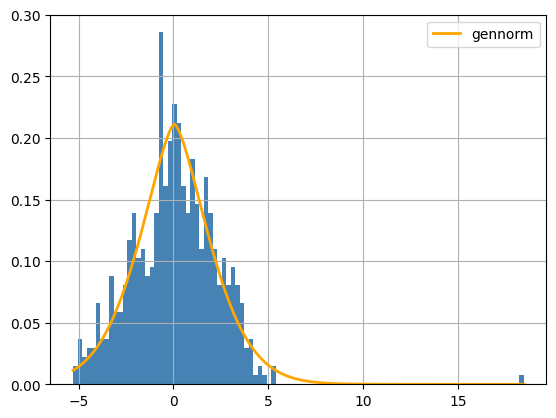

In [9]:
anomaly_detector.inspect(plot=True, plot_x_min='auto', plot_x_max='auto', series=False)

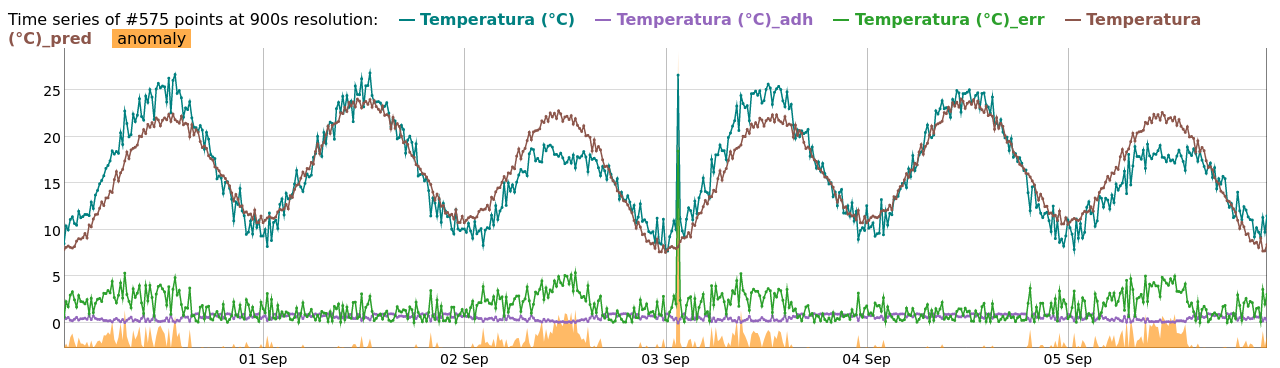

In [10]:
# Applicare il rilevatore di anomalie sulla serie temporale
anomaly_results = anomaly_detector.apply(timeseries_raw, index_bounds=['avg_err', 'max_err'], index_type='log', 
                                         multivariate_index_strategy='max', 
                                         data_loss_threshold=1.0, details=True, verbose=False)
anomaly_results.plot(image=True)

In [12]:
#print(anomaly_results.data['prediction_errors'].get('Temperatura (°C)')[390]) #errore di previsione --> differenza tra valore reale e valore previsto
#print(anomaly_results.data['actual_values'].get('Temperatura (°C)')[390]) #valore reale osservato

#print(anomaly_results.data['predicted_values'].get('Temperatura (°C)')[390]) #valore previsto dal modello

AttributeError: 'TimeSeries' object has no attribute 'data'